# Application of artificial intelligence methods for predicting groundwater levels using qualitative and hydrological data

### The AI models used in this research are Random Forest (RF), eXtreme Gradient Boosting (XGBOOST), Support Vector Regression (SVR), and Multilayer Perceptron (MLP). 

#### The database used in the simulation includes data related on Total Dissolved Solids (TDS), Electrical Conductivity (EC), pH, Precipitation (mm), Evaporation (m), Skin reservoir content (m), Calcium (Ca), and Magnesium (Mg) over 8 scenarios.

In [7]:
# Load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('shahryar-interpolated.csv')

In [8]:
df.head()

,date,T,Precepitation(mm),Evaporation(m),Skin reservoir content(m),EC,TDS,pH,Ca,Mg,GW-level
0,10/22/2002,19.9,2.7,-0.000071,0.000005,585.000000,350.000000,7.700000,3.000000,1.300000,1053.293611
1,11/22/2002,12.3,26.5,-0.000112,0.000027,589.000000,354.000000,7.770000,3.060000,1.310000,1053.232556
2,12/22/2002,7.4,38.5,-0.000143,0.000049,590.085096,356.766032,7.816959,3.070377,1.317534,1053.503312
3,1/22/2003,5.1,24.3,-0.000096,0.000014,598.425610,350.766277,7.786893,3.031532,1.278776,1053.526578
4,2/22/2003,5.6,11.4,-0.000337,0.000034,606.005363,349.600968,7.796719,3.001814,1.259395,1053.698702


## correlation-heatmap

### A high correlation between an input variable and GWL indicates that changes in this input are strongly associated with changes in groundwater levels. 

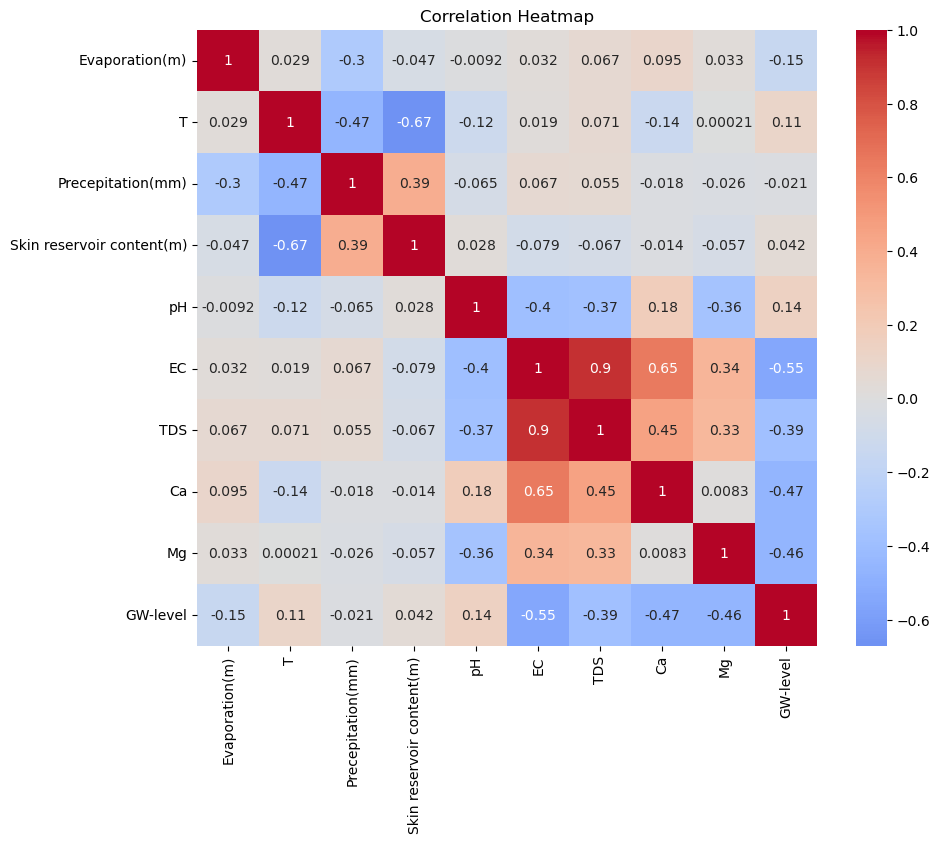

Correlation with target (GW-level):
GW-level                     1.000000
pH                           0.144639
T                            0.111754
Skin reservoir content(m)    0.041832
Precepitation(mm)           -0.020934
Evaporation(m)              -0.150396
TDS                         -0.387596
Mg                          -0.464694
Ca                          -0.467235
EC                          -0.551039
Name: GW-level, dtype: float64

Variance Inflation Factor (VIF):
                     feature         VIF
0             Evaporation(m)    2.764200
1                          T    8.249326
2          Precepitation(mm)    2.348538
3  Skin reservoir content(m)    3.483868
4                         pH   62.390575
5                         EC  306.818585
6                        TDS  169.762874
7                         Ca   81.346873
8                         Mg   17.857865

Features with low correlation with GW-level:
['Skin reservoir content(m)', 'Precepitation(mm)']


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select feature columns and target column
features = ['Evaporation(m)', 'T', 'Precepitation(mm)', 'Skin reservoir content(m)','pH', 'EC', 'TDS', 'Ca', 'Mg']
target = 'GW-level'

# Calculate the correlation matrix
correlation_matrix = df[features + [target]].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Display the correlation values with the target variable
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)
print("Correlation with target (GW-level):")
print(correlation_with_target)

# Calculate VIF for each feature
X = df[features]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# Identifying features to potentially remove
low_correlation_features = correlation_with_target[abs(correlation_with_target) < 0.1].index.tolist()
print("\nFeatures with low correlation with GW-level:")
print(low_correlation_features)


In [12]:
#XGBOOST Full dataframe
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 871.5 kB/s eta 0:02:24
   ---------------------------------------- 0.1/124.9 MB 653.6 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:01
   ---------------------------------------- 0.3/124.9 MB 1.2 MB/s eta 0:01:46
   ---------------------------------------- 0.5/124.9 MB 1.6 MB/s eta 0:01:18
   ---------------------------------------- 0.5/124.9 MB 1.7 MB/s eta 0:01:16
   ---------------------------------------- 0.5/124.9 MB 1.4 MB/s eta 0:01:30
   ---------------------------------------- 0.7/124.9 MB 1.6 MB/s eta 0:01:19
   ----------------------

   ----------- --------------------------- 37.9/124.9 MB 262.8 kB/s eta 0:05:32
   ----------- --------------------------- 37.9/124.9 MB 262.4 kB/s eta 0:05:32
   ----------- --------------------------- 37.9/124.9 MB 262.4 kB/s eta 0:05:32
   ----------- --------------------------- 37.9/124.9 MB 262.2 kB/s eta 0:05:32
   ----------- --------------------------- 38.0/124.9 MB 262.5 kB/s eta 0:05:32
   ----------- --------------------------- 38.0/124.9 MB 262.4 kB/s eta 0:05:32
   ----------- --------------------------- 38.0/124.9 MB 262.4 kB/s eta 0:05:32
   ----------- --------------------------- 38.0/124.9 MB 262.9 kB/s eta 0:05:31
   ----------- --------------------------- 38.0/124.9 MB 262.5 kB/s eta 0:05:31
   ----------- --------------------------- 38.0/124.9 MB 262.5 kB/s eta 0:05:31
   ----------- --------------------------- 38.0/124.9 MB 263.2 kB/s eta 0:05:31
   ----------- --------------------------- 38.1/124.9 MB 263.3 kB/s eta 0:05:30
   ----------- -------------------------

      Metric     Value
0       RMSE  0.779013
1       MAPE  0.047474
2  R-squared  0.935524
3         SI  0.000742


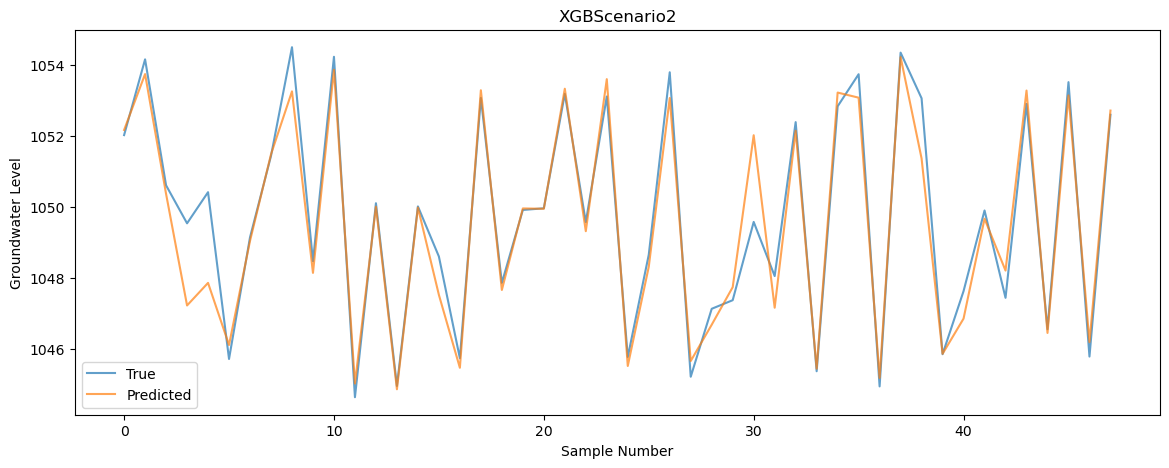

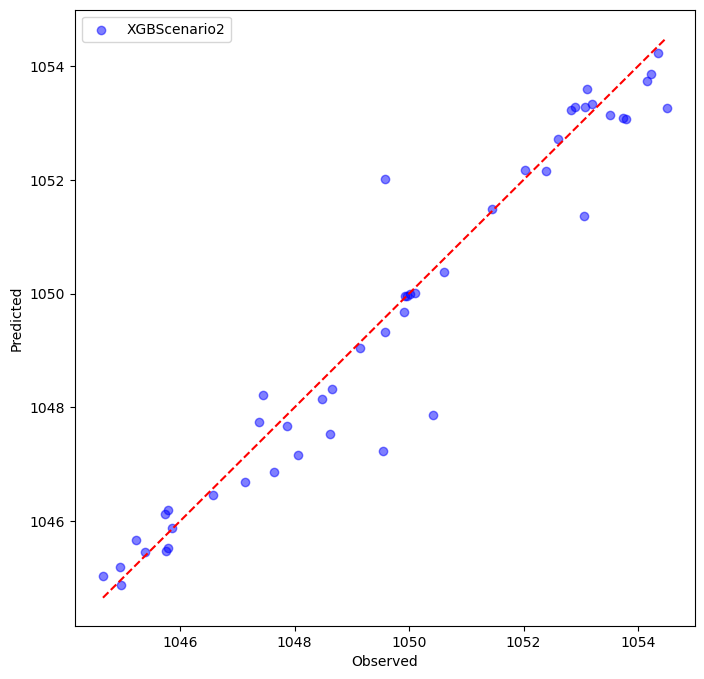

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt


# Select feature columns and target column
features = ['Evaporation(m)', 'T', 'Precepitation(mm)', 'Skin reservoir content(m)','pH', 'EC', 'TDS', 'Ca', 'Mg']
target = 'GW-level'
X = df[features].values
y = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
XGBmse2 = mean_squared_error(y_test, y_pred)
XGBrmse2 = np.sqrt(XGBmse2)
XGBmape2 = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
XGBr22 = r2_score(y_test, y_pred)
XGBsi2 = XGBrmse2 / np.mean(y_test)

# Create a DataFrame for the metrics
XGBmetrics_df2 = pd.DataFrame({
    'Metric': [ 'RMSE', 'MAPE', 'R-squared', 'SI'],
    'Value': [ XGBrmse2, XGBmape2, XGBr22, XGBsi2]
})

# Display the DataFrame
print(XGBmetrics_df2)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('XGBScenario2')
plt.xlabel('Sample Number')
plt.ylabel('Groundwater Level')
plt.show()

# Assuming y_test and y_pred are defined as lists or arrays of values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='XGBScenario2')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.legend()

plt.xlabel('Observed')
plt.ylabel('Predicted')

plt.show()


In [ ]:
#XGBOOST GW-quality dataframe

      Metric     Value
0       RMSE  0.722813
1       MAPE  0.045098
2  R-squared  0.944491
3         SI  0.000498


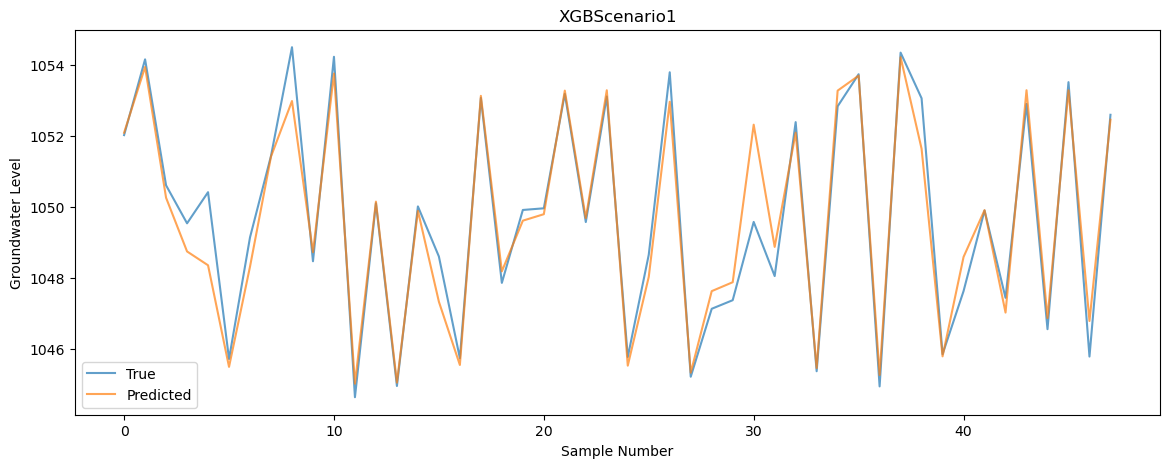

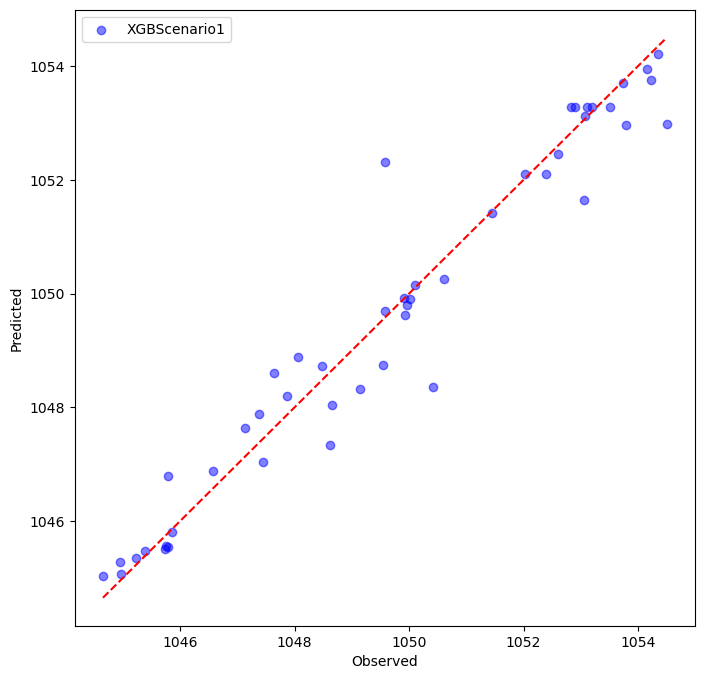

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt


# Select feature columns and target column
features = ['pH', 'EC', 'TDS', 'Ca', 'Mg']
target = 'GW-level'
X = df[features].values
y = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
XGBmse1 = mean_squared_error(y_test, y_pred)
XGBrmse1 = np.sqrt(XGBmse1)
XGBmape1 = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
XGBr21 = r2_score(y_test, y_pred)
XGBsi1 = XGBmse1 / np.mean(y_test)

# Create a DataFrame for the metrics
XGBmetrics_df1 = pd.DataFrame({
    'Metric': [ 'RMSE', 'MAPE', 'R-squared', 'SI'],
    'Value': [ XGBrmse1, XGBmape1, XGBr21, XGBsi1]
})

# Display the DataFrame
print(XGBmetrics_df1)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('XGBScenario1')
plt.xlabel('Sample Number')
plt.ylabel('Groundwater Level')
plt.show()

# Assuming y_test and y_pred are defined as lists or arrays of values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='XGBScenario1')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')


plt.legend()

plt.xlabel('Observed')
plt.ylabel('Predicted')

plt.show()

In [25]:
import pandas as pd

# Metrics for the first scenario
XGBscenario_1 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [XGBrmse1, XGBmape1, XGBsi1, XGBr21],
    'Scenario': ['XGBScenario 1'] * 4
}

# Metrics for the second scenario
XGBscenario_2 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [XGBrmse2, XGBmape2, XGBsi2, XGBr22],
    'Scenario': ['XGBScenario 2'] * 4
}

# Create individual DataFrames
df1 = pd.DataFrame(XGBscenario_1)
df2 = pd.DataFrame(XGBscenario_2)


# Concatenate the DataFrames
metrics_df = pd.concat([df1, df2], ignore_index=True)

# Pivot the DataFrame to get scenarios as columns
pivot_df = metrics_df.pivot(index='Metric', columns='Scenario', values='Value').reset_index()

# Display the consolidated DataFrame
print(pivot_df)


Scenario     Metric  XGBScenario 1  XGBScenario 2
0              MAPE       0.045098       0.047474
1         R-squared       0.944491       0.935524
2              RMSE       0.722813       0.779013
3                SI       0.000498       0.000742


In [ ]:
#MLP full dataframe

      Metric     Value
0       RMSE  0.782366
1       MAPE  0.056898
2  R-squared  0.934968
3         SI  0.000054


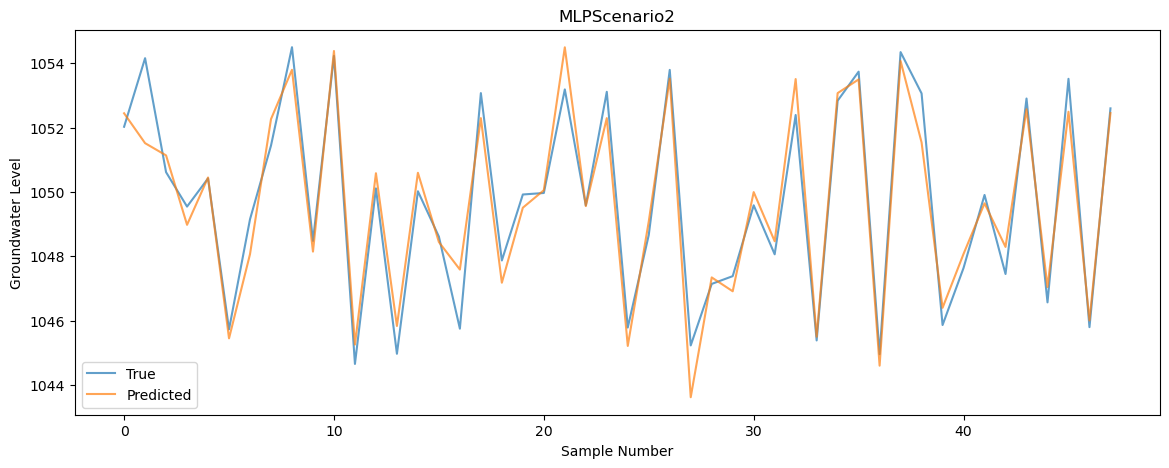

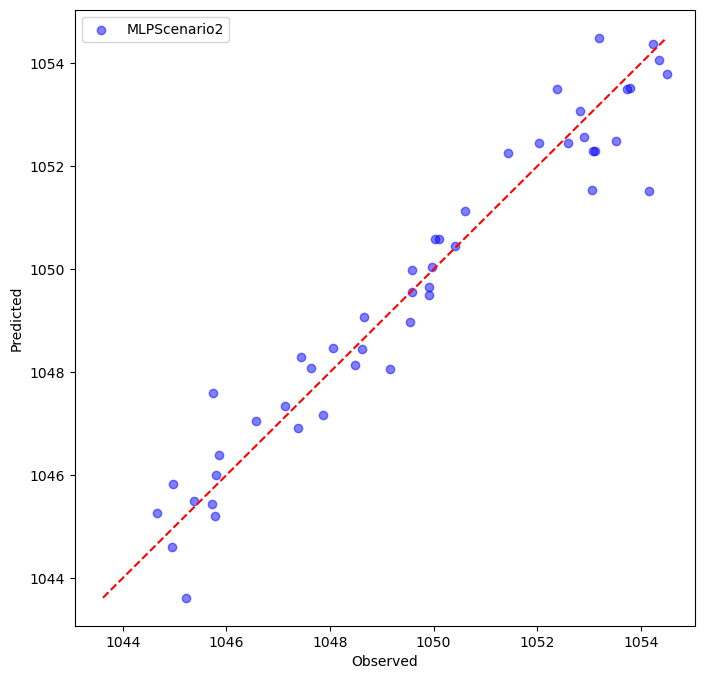

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Select feature columns and target column
features = ['Evaporation(m)', 'T', 'Precepitation(mm)', 'Skin reservoir content(m)','pH', 'EC', 'TDS', 'Ca', 'Mg']
target = 'GW-level'
X = df[features].values
y = df[target].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Create and train the MLP model
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
MLPmse2 = mean_squared_error(y_test, y_pred)
MLPrmse2 = np.sqrt(MLPmse2)
MLPmape2 = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
MLPr22 = r2_score(y_test, y_pred)
MLPsi2 = MLPmape2 / np.mean(y_test)

# Create a DataFrame for the metrics
MLPmetrics_df2 = pd.DataFrame({
    'Metric': [ 'RMSE', 'MAPE', 'R-squared', 'SI'],
    'Value': [ MLPrmse2, MLPmape2, MLPr22, MLPsi2]
})

# Display the DataFrame
print(MLPmetrics_df2)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('MLPScenario2')
plt.xlabel('Sample Number')
plt.ylabel('Groundwater Level')
plt.show()

# Assuming y_test and y_pred are defined as lists or arrays of values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='MLPScenario2')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.legend()

plt.xlabel('Observed')
plt.ylabel('Predicted')


plt.show()

In [ ]:
#MLP GW-quality data frame

      Metric     Value
0       RMSE  0.612688
1       MAPE  0.047353
2  R-squared  0.960117
3         SI  0.000584


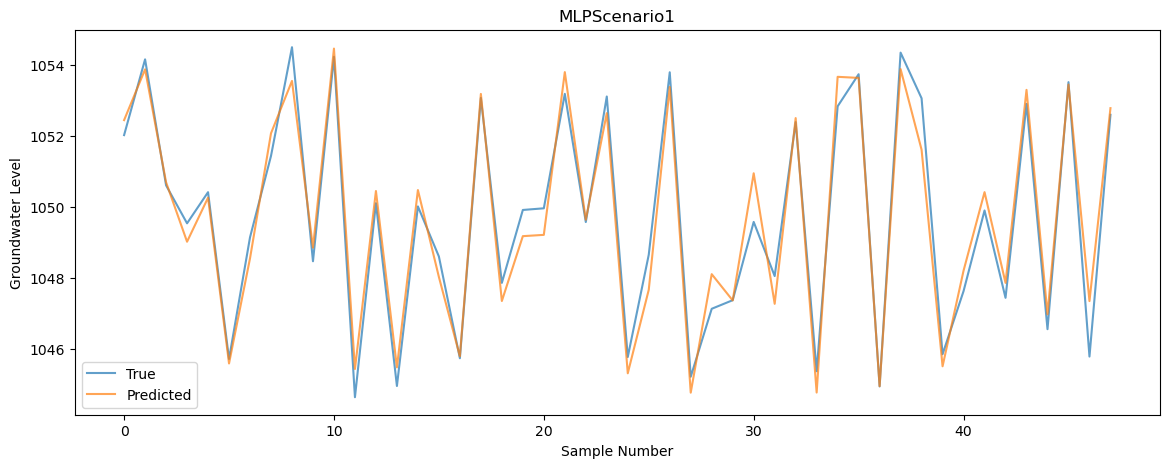

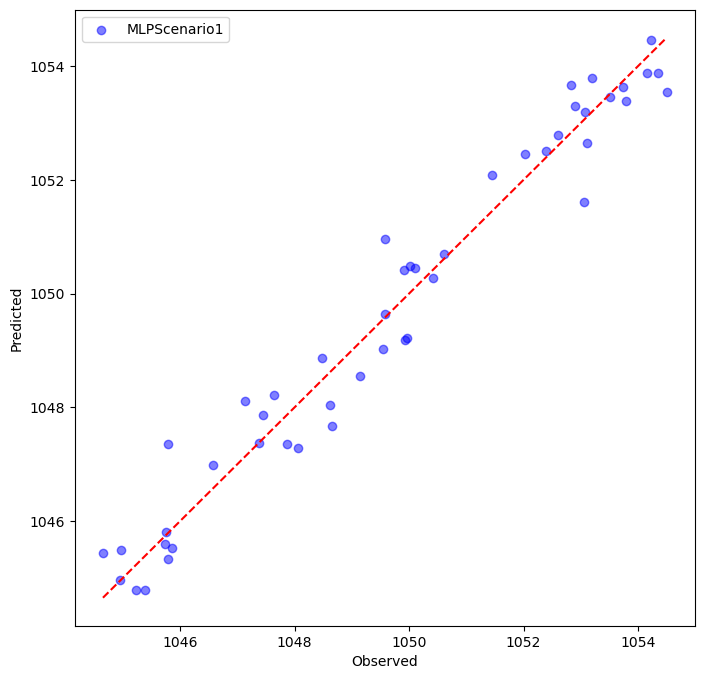

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select feature columns and target column
features = ['pH', 'EC', 'TDS', 'Ca', 'Mg']
target = 'GW-level'
X = df[features].values
y = df[target].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Create and train the MLP model
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
MLPmse1 = mean_squared_error(y_test, y_pred)
MLPrmse1 = np.sqrt(MLPmse1)
MLPmape1 = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
MLPr21 = r2_score(y_test, y_pred)
MLPsi1 = MLPrmse1 / np.mean(y_test)

# Create a DataFrame for the metrics
MLPmetrics_df1 = pd.DataFrame({
    'Metric': [ 'RMSE', 'MAPE', 'R-squared', 'SI'],
    'Value': [ MLPrmse1, MLPmape1, MLPr21, MLPsi1]
})

# Display the DataFrame
print(MLPmetrics_df1)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('MLPScenario1')
plt.xlabel('Sample Number')
plt.ylabel('Groundwater Level')
plt.show()
# Assuming y_test and y_pred are defined as lists or arrays of values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='MLPScenario1')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.legend()

plt.xlabel('Observed')
plt.ylabel('Predicted')

plt.show()



In [26]:
import pandas as pd

# Metrics for the first scenario
MLPscenario_1 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [MLPrmse1, MLPmape1, MLPsi1, MLPr21],
    'Scenario': ['MLPScenario 1'] * 4
}

# Metrics for the second scenario
MLPscenario_2 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [MLPrmse2, MLPmape2, MLPsi2, MLPr22],
    'Scenario': ['MLPScenario 2'] * 4
}


# Create individual DataFrames
df1 = pd.DataFrame(MLPscenario_1)
df2 = pd.DataFrame(MLPscenario_2)

# Concatenate the DataFrames
metrics_df = pd.concat([df1, df2], ignore_index=True)

# Pivot the DataFrame to get scenarios as columns
pivot_df = metrics_df.pivot(index='Metric', columns='Scenario', values='Value').reset_index()

# Display the consolidated DataFrame
print(pivot_df)


Scenario     Metric  MLPScenario 1  MLPScenario 2
0              MAPE       0.047353       0.056898
1         R-squared       0.960117       0.934968
2              RMSE       0.612688       0.782366
3                SI       0.000584       0.000054


In [ ]:
#Random Forest

In [ ]:
#RF full data frame

      Metric     Value
0       RMSE  0.835834
1       MAPE  0.056271
2  R-squared  0.925775
3         SI  0.000796


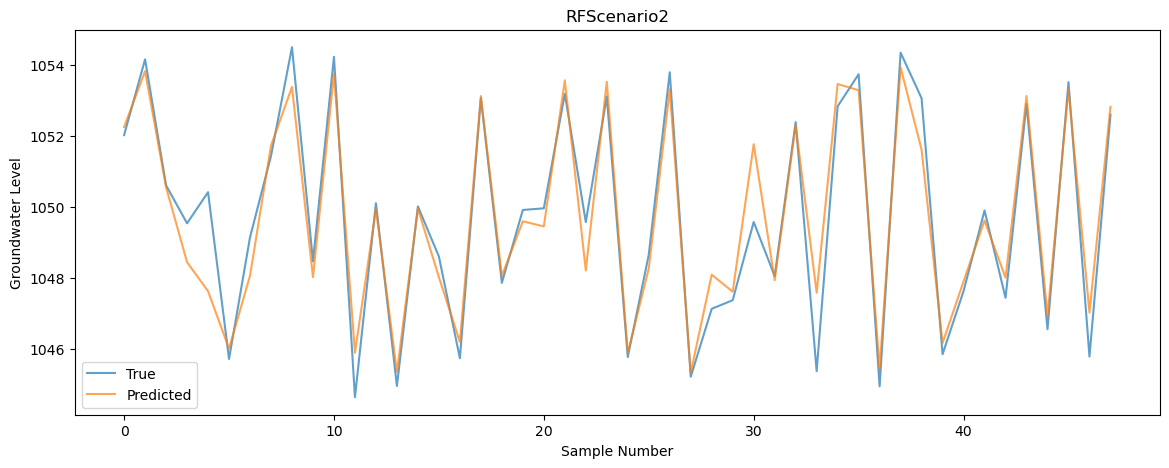

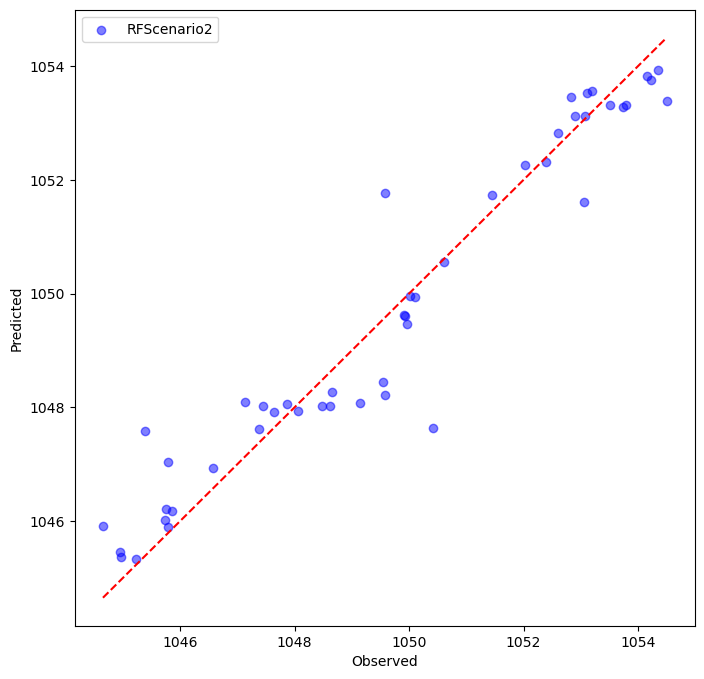

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select feature columns and target column
features = ['Evaporation(m)', 'T', 'Precepitation(mm)', 'Skin reservoir content(m)','pH', 'EC', 'TDS', 'Ca', 'Mg']
target = 'GW-level'
X = df[features].values
y = df[target].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
RFmse2 = mean_squared_error(y_test, y_pred)
RFrmse2 = np.sqrt(RFmse2)
RFmape2 = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
RFr22 = r2_score(y_test, y_pred)
RFsi2 = RFrmse2 / np.mean(y_test)

# Create a DataFrame for the metrics
RFmetrics_df2 = pd.DataFrame({
    'Metric': [ 'RMSE', 'MAPE', 'R-squared', 'SI'],
    'Value': [ RFrmse2, RFmape2, RFr22, RFsi2]
})

# Display the DataFrame
print(RFmetrics_df2)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('RFScenario2')
plt.xlabel('Sample Number')
plt.ylabel('Groundwater Level')
plt.show()

# Assuming y_test and y_pred are defined as lists or arrays of values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='RFScenario2')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.legend()

plt.xlabel('Observed')
plt.ylabel('Predicted')

plt.show()

In [ ]:
#RF GW-quality dataframe

      Metric     Value
0       RMSE  0.847383
1       MAPE  0.055984
2  R-squared  0.923710
3         SI  0.000807


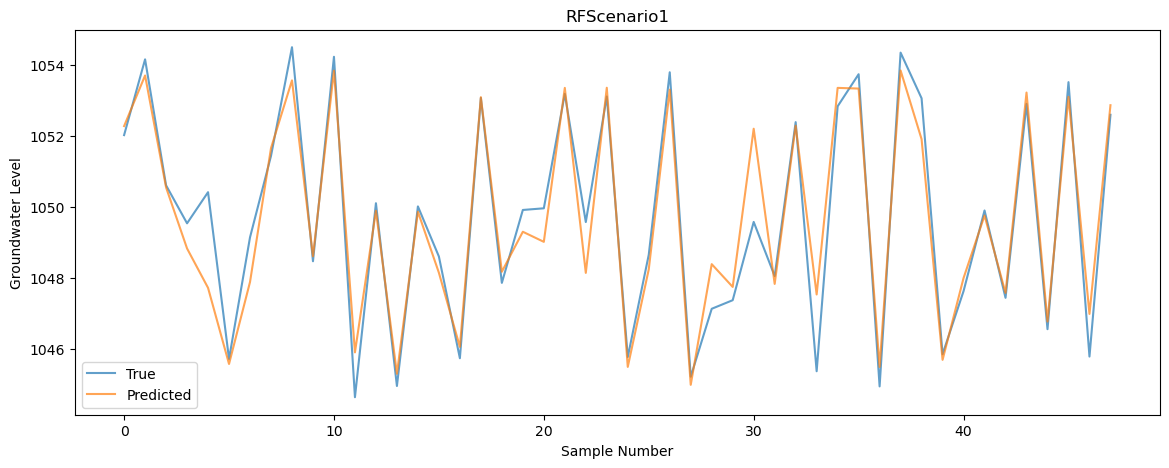

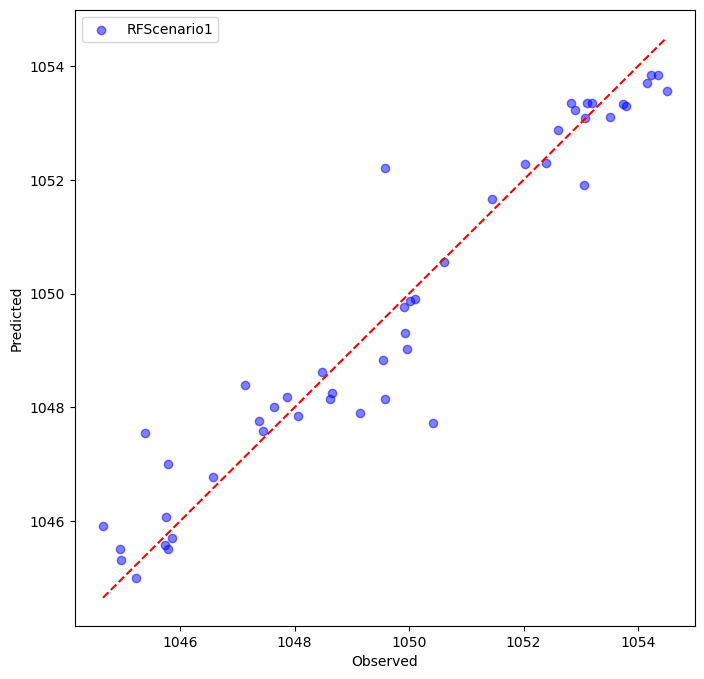

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select feature columns and target column
features = ['pH', 'EC', 'TDS', 'Ca', 'Mg']
target = 'GW-level'
X = df[features].values
y = df[target].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
RFmse1 = mean_squared_error(y_test, y_pred)
RFrmse1 = np.sqrt(RFmse1)
RFmape1 = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
RFr21 = r2_score(y_test, y_pred)
RFsi1 = RFrmse1 / np.mean(y_test)

# Create a DataFrame for the metrics
RFmetrics_df1 = pd.DataFrame({
    'Metric': [ 'RMSE', 'MAPE', 'R-squared', 'SI'],
    'Value': [ RFrmse1, RFmape1, RFr21, RFsi1]
})

# Display the DataFrame
print(RFmetrics_df1)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('RFScenario1')
plt.xlabel('Sample Number')
plt.ylabel('Groundwater Level')
plt.show()
# Assuming y_test and y_pred are defined as lists or arrays of values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='RFScenario1')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.legend()

plt.xlabel('Observed')
plt.ylabel('Predicted')

plt.show()

In [29]:
import pandas as pd

# Metrics for the first scenario
RFscenario_1 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [RFrmse1, RFmape1, RFsi1, RFr21],
    'Scenario': ['RFScenario 1'] * 4
}

# Metrics for the second scenario
RFscenario_2 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [RFrmse2, RFmape2, RFsi2, RFr22],
    'Scenario': ['RFScenario 2'] * 4
}


# Create individual DataFrames
df1 = pd.DataFrame(RFscenario_1)
df2 = pd.DataFrame(RFscenario_2)

# Concatenate the DataFrames
metrics_df = pd.concat([df1, df2], ignore_index=True)

# Pivot the DataFrame to get scenarios as columns
pivot_df = metrics_df.pivot(index='Metric', columns='Scenario', values='Value').reset_index()

# Display the consolidated DataFrame
print(pivot_df)


Scenario     Metric  RFScenario 1  RFScenario 2
0              MAPE      0.055984      0.056271
1         R-squared      0.923710      0.925775
2              RMSE      0.847383      0.835834
3                SI      0.000807      0.000796


In [ ]:
#SVR

In [ ]:
#SVR full dataframe

      Metric     Value
0       RMSE  0.910843
1       MAPE  0.070415
2  R-squared  0.911855
3         SI  0.000868


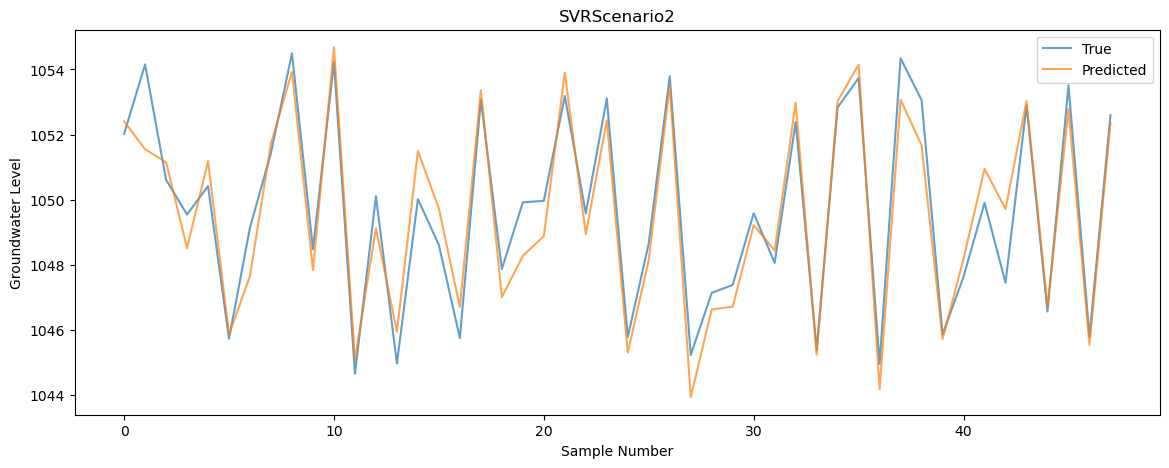

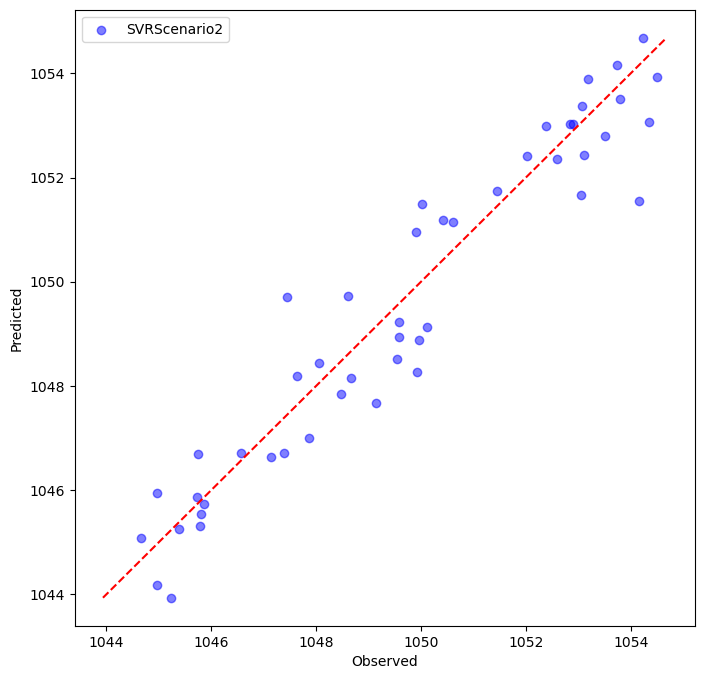

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select feature columns and target column
features = ['Evaporation(m)', 'T', 'Precepitation(mm)', 'Skin reservoir content(m)','pH', 'EC', 'TDS', 'Ca', 'Mg']
target = 'GW-level'
X = df[features].values
y = df[target].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Create and train the SVR model
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()  # Corrected reshape

# Calculate evaluation metrics
SVRmse2 = mean_squared_error(y_test, y_pred)
SVRrmse2 = np.sqrt(SVRmse2)
SVRmape2 = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
SVRr22 = r2_score(y_test, y_pred)
SVRsi2 = SVRrmse2 / np.mean(y_test)

# Create a DataFrame for the metrics
SVRmetrics_df2 = pd.DataFrame({
    'Metric': [ 'RMSE', 'MAPE', 'R-squared', 'SI'],
    'Value': [ SVRrmse2, SVRmape2, SVRr22, SVRsi2]
})

# Display the DataFrame
print(SVRmetrics_df2)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('SVRScenario2')
plt.xlabel('Sample Number')
plt.ylabel('Groundwater Level')
plt.show()

# Assuming y_test and y_pred are defined as lists or arrays of values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='SVRScenario2')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.legend()
plt.xlabel('Observed')
plt.ylabel('Predicted')

plt.show()

In [ ]:
#SVR GW-quality dataframe

      Metric     Value
0       RMSE  0.901277
1       MAPE  0.068724
2  R-squared  0.913697
3         SI  0.000859


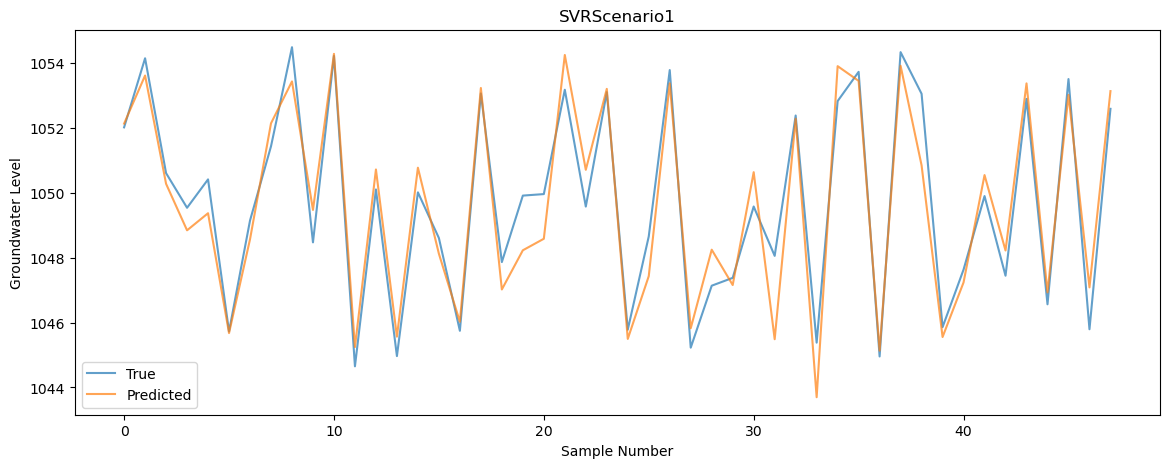

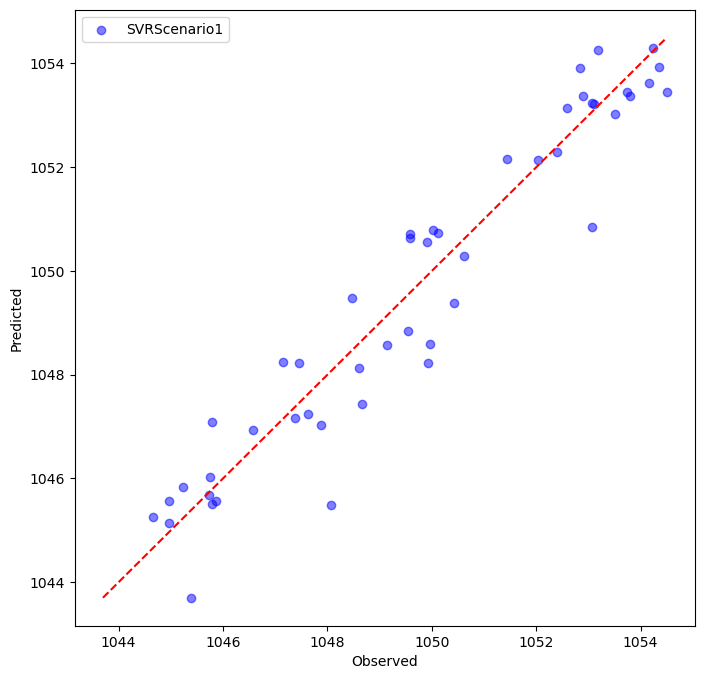

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select feature columns and target column
features = ['pH', 'EC', 'TDS', 'Ca', 'Mg']
target = 'GW-level'
X = df[features].values
y = df[target].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Create and train the SVR model
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()  # Corrected reshape

# Calculate evaluation metrics
SVRmse1 = mean_squared_error(y_test, y_pred)
SVRrmse1 = np.sqrt(SVRmse1)
SVRmape1 = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
SVRr21 = r2_score(y_test, y_pred)
SVRsi1 = SVRrmse1 / np.mean(y_test)

# Create a DataFrame for the metrics
SVRmetrics_df1 = pd.DataFrame({
    'Metric': [ 'RMSE', 'MAPE', 'R-squared', 'SI'],
    'Value': [ SVRrmse1, SVRmape1, SVRr21, SVRsi1]
})

# Display the DataFrame
print(SVRmetrics_df1)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('SVRScenario1')
plt.xlabel('Sample Number')
plt.ylabel('Groundwater Level')
plt.show()

# Assuming y_test and y_pred are defined as lists or arrays of values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='SVRScenario1')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.legend()
plt.xlabel('Observed')
plt.ylabel('Predicted')

plt.show()

In [32]:
import pandas as pd

# Metrics for the first scenario
SVRscenario_1 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [SVRrmse1, SVRmape1, SVRsi1, SVRr21],
    'Scenario': ['SVRScenario 1'] * 4
}

# Metrics for the second scenario
SVRscenario_2 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [SVRrmse2, SVRmape2, SVRsi2, SVRr22],
    'Scenario': ['SVRScenario 2'] * 4
}

# Create individual DataFrames
df1 = pd.DataFrame(SVRscenario_1)
df2 = pd.DataFrame(SVRscenario_2)

# Concatenate the DataFrames
metrics_df = pd.concat([df1, df2], ignore_index=True)

# Pivot the DataFrame to get scenarios as columns
pivot_df = metrics_df.pivot(index='Metric', columns='Scenario', values='Value').reset_index()

# Display the consolidated DataFrame
print(pivot_df)


Scenario     Metric  SVRScenario 1  SVRScenario 2
0              MAPE       0.068724       0.070415
1         R-squared       0.913697       0.911855
2              RMSE       0.901277       0.910843
3                SI       0.000859       0.000868


In [33]:
import pandas as pd

# Metrics for the XGB scenarios
XGBscenario_1 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [XGBrmse1, XGBmape1, XGBsi1, XGBr21],
    'Scenario': ['XGBScenario 1'] * 4
}
XGBscenario_2 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [XGBrmse2, XGBmape2, XGBsi2, XGBr22],
    'Scenario': ['XGBScenario 2'] * 4
}
# Metrics for the MLP scenarios
MLPscenario_1 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [MLPrmse1, MLPmape1, MLPsi1, MLPr21],
    'Scenario': ['MLPScenario 1'] * 4
}
MLPscenario_2 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [MLPrmse2, MLPmape2, MLPsi2, MLPr22],
    'Scenario': ['MLPScenario 2'] * 4
}
# Metrics for the RF scenarios
RFscenario_1 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [RFrmse1, RFmape1, RFsi1, RFr21],
    'Scenario': ['RFScenario 1'] * 4
}
RFscenario_2 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [RFrmse2, RFmape2, RFsi2, RFr22],
    'Scenario': ['RFScenario 2'] * 4
}

# Metrics for the SVR scenarios
SVRscenario_1 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [SVRrmse1, SVRmape1, SVRsi1, SVRr21],
    'Scenario': ['SVRScenario 1'] * 4
}
SVRscenario_2 = {
    'Metric': ['RMSE', 'MAPE', 'SI', 'R-squared'],
    'Value': [SVRrmse2, SVRmape2, SVRsi2, SVRr22],
    'Scenario': ['SVRScenario 2'] * 4
}



# Create individual DataFrames for XGB, MLP, RF, and SVR scenarios
df_xgb1 = pd.DataFrame(XGBscenario_1)
df_xgb2 = pd.DataFrame(XGBscenario_2)

df_mlp1 = pd.DataFrame(MLPscenario_1)
df_mlp2 = pd.DataFrame(MLPscenario_2)

df_rf1 = pd.DataFrame(RFscenario_1)
df_rf2 = pd.DataFrame(RFscenario_2)

df_svr1 = pd.DataFrame(SVRscenario_1)
df_svr2 = pd.DataFrame(SVRscenario_2)

# Concatenate the DataFrames
metrics_df = pd.concat([df_xgb1, df_xgb2, df_mlp1, df_mlp2, df_rf1, df_rf2, df_svr1, df_svr2], ignore_index=True)

# Pivot the DataFrame to get scenarios as columns
pivot_df = metrics_df.pivot(index='Metric', columns='Scenario', values='Value').reset_index()

# Display the consolidated DataFrame
print(pivot_df)


Scenario     Metric  MLPScenario 1  MLPScenario 2  RFScenario 1  RFScenario 2  \
0              MAPE       0.047353       0.056898      0.055984      0.056271   
1         R-squared       0.960117       0.934968      0.923710      0.925775   
2              RMSE       0.612688       0.782366      0.847383      0.835834   
3                SI       0.000584       0.000054      0.000807      0.000796   

Scenario  SVRScenario 1  SVRScenario 2  XGBScenario 1  XGBScenario 2  
0              0.068724       0.070415       0.045098       0.047474  
1              0.913697       0.911855       0.944491       0.935524  
2              0.901277       0.910843       0.722813       0.779013  
3              0.000859       0.000868       0.000498       0.000742  


In [ ]:
import pandas as pd

# Assuming pivot_df is already created and populated with your data
# This includes all scenarios (XGB, MLP, RF, SVR) as columns

# Specify the file path where you want to save the Excel file
excel_file = 'consolidated_metrics.xlsx'

# Export pivot_df to Excel
pivot_df.to_excel(excel_file, index=False)

print(f"DataFrame successfully written to {excel_file}")


DataFrame successfully written to consolidated_metrics.xlsx


# Conclusion

### This study found that the MLP model, demonstrated superior predictive functionality, particularly in Scenario 1. The correlation heat map and statistical analyses confirmed that use of groundwater quality data alone had a greater impact on groundwater level prediction than when combined with hydrological data. Overall, the MLP model in MLPScenario1 proved as the most accurate, effectively minimizing underestimation and outperforming the other models in terms of accuracy.